___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
from pandas_profiling import ProfileReport

In [4]:
profile = ProfileReport(df, title="Rapor")

In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile.to_file('rapor.html')

In [7]:
## Number of observations	10000
## Missing cells	0
## Duplicate rows	0
## Surname has a high cardinality: 2932 distinct values
## RowNumber is uniformly distributed
## RowNumber has unique values
## CustomerId has unique values
## Tenure has 413 (4.1%) zeros
## Balance has 3617 (36.2%) zeros

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
drop_list = ['RowNumber','CustomerId','Surname']

In [10]:
df.drop(drop_list,axis = 1 ,inplace  = True)

In [11]:
df.shape

(10000, 11)

In [12]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df = pd.get_dummies(df,drop_first = True)

In [14]:
df.shape

(10000, 12)

In [15]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1       101348.880       1                  0   
1               1       112542.580       0                  0   
2               0       113931.570       1                  0   
3               0        93826.630       0                  0   
4               1        79084.100       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 101)

In [19]:
X_train.shape

(9000, 11)

In [20]:
X_test.shape

(1000, 11)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train          # array oldu zaten !

array([[0.45      , 0.2972973 , 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.55      , 0.18918919, 0.7       , ..., 0.        , 1.        ,
        1.        ],
       [0.77      , 0.74324324, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.498     , 0.58108108, 0.1       , ..., 1.        , 0.        ,
        1.        ],
       [0.73      , 0.21621622, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.516     , 0.2027027 , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

# Modelling & Model Performance

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [25]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [26]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 250, verbose=1)

Epoch 1/250
254/254 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.7980 - val_loss: 0.4776 - val_accuracy: 0.7811
Epoch 2/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7980 - val_loss: 0.4565 - val_accuracy: 0.7811
Epoch 3/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.7980 - val_loss: 0.4417 - val_accuracy: 0.7811
Epoch 4/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.8074 - val_loss: 0.4333 - val_accuracy: 0.7989
Epoch 5/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8217 - val_loss: 0.4285 - val_accuracy: 0.8100
Epoch 6/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8242 - val_loss: 0.4219 - val_accuracy: 0.8144
Epoch 7/250
254/254 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8291 - val_loss: 0.4137 - val_accuracy: 0.8267

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [28]:
loss_df = pd.DataFrame(model.history.history)

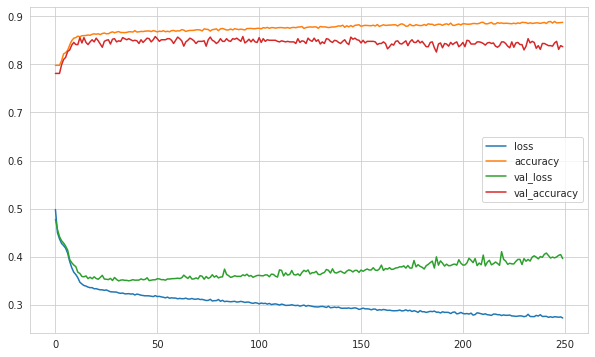

In [29]:
loss_df.plot();

In [30]:
## overfittingi çok rahat görüyoruz

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4147718846797943
accuracy :  0.8240000009536743


In [32]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[733  63]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       796
           1       0.59      0.45      0.51       204

    accuracy                           0.82      1000
   macro avg       0.73      0.68      0.70      1000
weighted avg       0.81      0.82      0.81      1000



In [34]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve

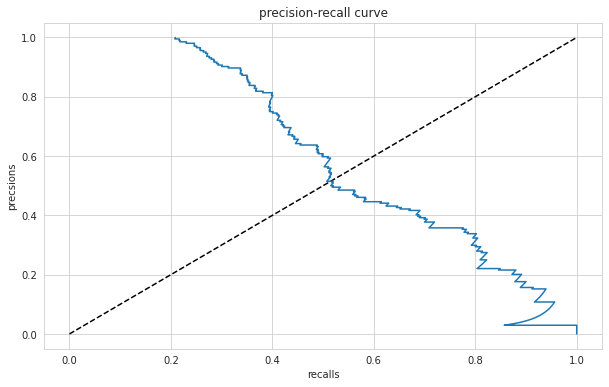

In [36]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precisions,recalls, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precsions')
plt.title('precision-recall curve')
plt.show()

# bizim modelimiz 1'leri öğrenemiyor !!!!

In [40]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [42]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights)

Epoch 1/250
254/254 [==============================] - 1s 2ms/step - loss: 0.6643 - recall: 0.6528 - val_loss: 0.6684 - val_recall: 0.7056
Epoch 2/250
254/254 [==============================] - 0s 2ms/step - loss: 0.6252 - recall: 0.6449 - val_loss: 0.6021 - val_recall: 0.6244
Epoch 3/250
254/254 [==============================] - 1s 3ms/step - loss: 0.6048 - recall: 0.6498 - val_loss: 0.5826 - val_recall: 0.6802
Epoch 4/250
254/254 [==============================] - 1s 3ms/step - loss: 0.5897 - recall: 0.6699 - val_loss: 0.5642 - val_recall: 0.6853
Epoch 5/250
254/254 [==============================] - 1s 3ms/step - loss: 0.5812 - recall: 0.6877 - val_loss: 0.6131 - val_recall: 0.7766
Epoch 6/250
254/254 [==============================] - 0s 2ms/step - loss: 0.5762 - recall: 0.6968 - val_loss: 0.5975 - val_recall: 0.7716
Epoch 7/250
254/254 [==============================] - 0s 1ms/step - loss: 0.5718 - recall: 0.7048 - val_loss: 0.5743 - val_recall: 0.7259
Epoch 8/250
254/254 [======

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0 0.664   0.653     0.668       0.706
1 0.625   0.645     0.602       0.624
2 0.605   0.650     0.583       0.680
3 0.590   0.670     0.564       0.685
4 0.581   0.688     0.613       0.777

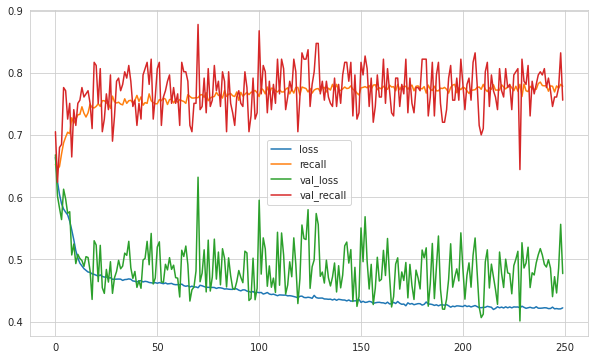

In [45]:
loss_df.plot();

In [46]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4922887980937958
accuracy :  0.7352941036224365


In [47]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[617 179]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.46      0.74      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.82      0.77      0.78      1000



In [48]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [62]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.42))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.20))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

#opt = Adam(lr = 0.001)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [63]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [64]:
model.fit(x = X_train, 
          y = y_train,
          validation_split = 0.1,
          batch_size = 32, 
          epochs = 750, 
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/750
254/254 [==============================] - 1s 2ms/step - loss: 0.6789 - recall: 0.4438 - val_loss: 0.6442 - val_recall: 0.7259
Epoch 2/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6764 - recall: 0.6656 - val_loss: 0.6507 - val_recall: 0.7766
Epoch 3/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6670 - recall: 0.7011 - val_loss: 0.6192 - val_recall: 0.7005
Epoch 4/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6596 - recall: 0.7017 - val_loss: 0.6484 - val_recall: 0.7868
Epoch 5/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6507 - recall: 0.7072 - val_loss: 0.6488 - val_recall: 0.8071
Epoch 6/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6462 - recall: 0.7048 - val_loss: 0.6164 - val_recall: 0.7360
Epoch 7/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6322 - recall: 0.6858 - val_loss: 0.6078 - val_recall: 0.7513
Epoch 8/750
254/254 [======

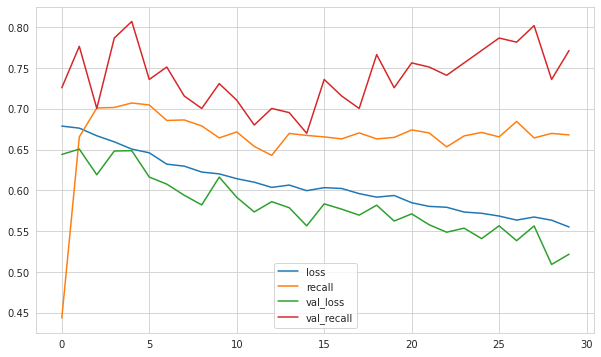

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [66]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.6634558439254761
recall :  0.7254902124404907


In [67]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[448 348]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.89      0.56      0.69       796
           1       0.30      0.73      0.42       204

    accuracy                           0.60      1000
   macro avg       0.59      0.64      0.56      1000
weighted avg       0.77      0.60      0.63      1000



In [68]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [74]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [75]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [76]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [77]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 1s 3ms/step - loss: 0.6360 - recall: 0.0055 - val_loss: 0.6409 - val_recall: 0.0051
Epoch 2/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6353 - recall: 0.0043 - val_loss: 0.6402 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.6346 - recall: 0.0031 - val_loss: 0.6396 - val_recall: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6338 - recall: 0.0024 - val_loss: 0.6389 - val_recall: 0.0000e+00
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6331 - recall: 0.0018 - val_loss: 0.6381 - val_recall: 0.0000e+00
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6322 - recall: 0.0018 - val_loss: 0.6373 - val_recall: 0.0000e+00
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 0.6314 -

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f62b9a8dcd0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [78]:
grid_model.best_score_

0.7026697175437724

In [79]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adadelta.Adadelta}

In [80]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
14            0.703           0.410                1   
6             0.608           0.394                2   
20            0.586           0.034                3   
4             0.585           0.042                4   
9             0.582           0.050                5   
17            0.572           0.035                6   
19            0.571           0.059                7   
23            0.565           0.034                8   
16            0.561           0.029                9   
5             0.560           0.064               10   
1             0.552           0.050               11   
8             0.550           0.032               12   
7             0.550           0.041               13   
11            0.549           0.046               14   
18            0.544           0.367               15   
3             0.534           0.046               16   
0             0.526           0.048               17   
13            0.522           0.029               18   
15            0.512           0.047               19   
21            0.509           0.175               20   
12            0.499           0.035               21   
22            0.448           0.372               22   
2             0.261           0.306               23   
10            0.235           0.264               24   

                                               params  
14  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
6   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
20  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
9   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
17  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
19  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
23  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
16  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
8   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
7   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
11  {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
18  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
13  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
15  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
21  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
12  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
22  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
2   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 32, 'learn_rate': 0.005, 'optim...

In [81]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[794   2]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.79      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.79      0.70      1000



## grid model'de 1'lerin hiç birisini yakalayamayan bir model ile karşı karşıyayız !! o yüzden bunu kullanmayacağım !

In [176]:
model = Sequential()

model.add(Dense(24, activation="relu", input_dim = X_train.shape[1]))


model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# opt = RMSprop(lr = 0.003)
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics = ["Recall"])

In [177]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 30, restore_best_weights = True)

In [178]:
model.fit(x = X_train, 
          y = y_train,
          validation_split = 0.1,
          batch_size = 32, 
          epochs = 750, 
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/750
254/254 [==============================] - 1s 2ms/step - loss: 0.6828 - recall: 0.4364 - val_loss: 0.6556 - val_recall: 0.7716
Epoch 2/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6407 - recall: 0.6314 - val_loss: 0.6027 - val_recall: 0.7411
Epoch 3/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6172 - recall: 0.6626 - val_loss: 0.6220 - val_recall: 0.8020
Epoch 4/750
254/254 [==============================] - 0s 2ms/step - loss: 0.6028 - recall: 0.6919 - val_loss: 0.6041 - val_recall: 0.7970
Epoch 5/750
254/254 [==============================] - 0s 2ms/step - loss: 0.5939 - recall: 0.7029 - val_loss: 0.6049 - val_recall: 0.7970
Epoch 6/750
254/254 [==============================] - 0s 2ms/step - loss: 0.5883 - recall: 0.6980 - val_loss: 0.5813 - val_recall: 0.7462
Epoch 7/750
254/254 [==============================] - 0s 2ms/step - loss: 0.5841 - recall: 0.6840 - val_loss: 0.5860 - val_recall: 0.7614
Epoch 8/750
254/254 [======

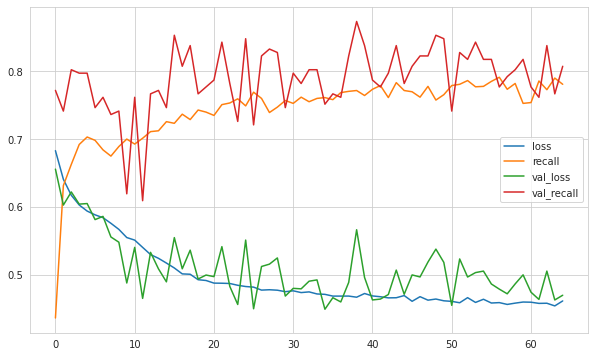

In [179]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [180]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.47473910450935364
recall :  0.6911764740943909


In [181]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[640 156]
 [ 63 141]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       796
           1       0.47      0.69      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



# Final Model and Model Deployment

In [182]:
model.save("churn.h5")

In [186]:
import pickle

In [187]:
pickle.dump(scaler,open("scaler_churn","wb"))

## Prediction

In [200]:
customer = df.drop("Exited",axis=1).iloc[15]
customer

CreditScore            616.000
Age                     45.000
Tenure                   3.000
Balance             143129.410
NumOfProducts            2.000
HasCrCard                0.000
IsActiveMember           1.000
EstimatedSalary      64327.260
Geography_Germany        1.000
Geography_Spain          0.000
Gender_Male              1.000
Name: 15, dtype: float64

In [201]:
predict_customer = scaler.transform(customer.values.reshape(-1,11))
predict_customer

array([[0.532     , 0.36486486, 0.3       , 0.57046831, 0.33333333,
        0.        , 1.        , 0.32164408, 1.        , 0.        ,
        1.        ]])

In [208]:
model.predict(predict_customer)> 0.5

array([[False]])

In [209]:
df["Exited"].iloc[15]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___